# Analyze images with Azure Computer Vision

The Computer Vision is a cognitive service in Microsoft Azure and provides pre-built, advanced algorithms that process and analyze images.

In this article, we will explore the pre-trained models of Azure Computer Vision service for image analysis.

You will learn how to:
* Provision a Computer Vision resource.
* Use a Computer Vision resource to analyze an image.

## Create a Computer Vision Resource

1. Sign in to [Azure Portal](https://portal.azure.com/) and select **Create a resource**.
2. Search for **Computer Vision** and then click **Create**.
3. Create a Computer Vision resource with the following settings:
    * **Subscription**: Your Azure subscription.
    * **Resource group**: Select an existing resource group or create a new one.
    * **Region**: Choose any available region, for example **North Europe**.
    * **Name**: This would be your custom domain name in your endpoint. Enter a unique name.
    * **Pricing tier**: You can use the free pricing tier (**F0**) to try the service, and upgrade later to a paid tier.
4. Select **Review + Create** and wait for deployment to complete.
5. One the deployment is complete, select **Go to resource**. On the **Overview** tab, click **Manage keys**. Save the **Key 1** and the **Endpoint**. You will need the key and the endpoint to connect to your Computer Vision resource from client applications.


## Import libraries

In [27]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image
from array import array
import os
import sys
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Create variables for your key and endpoint

In [28]:
key = '9edbfd76e0404f7596c4f75d8ed3043d'
endpoint = 'https://w4compvisiontask.cognitiveservices.azure.com/'

## Authenticate the client

In [9]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(key))

## Analyze images

First download the images used in the following examples from my [GitHub repository](https://github.com/sfoteini/azure-computer-vision).

### Generate image description

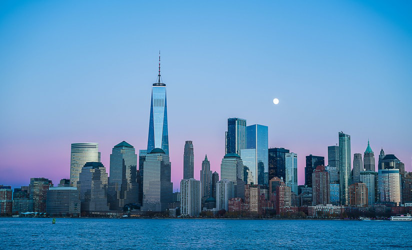

Description:
a city skyline with the moon in the sky with confidence 55.75%


In [10]:
# Open image file
image_path = "images/city2.jpg"
image = open(image_path, "rb")

# Display the image
display(Image.open(image_path).resize((412, 250)))

# Call the API
description_result = computervision_client.describe_image_in_stream(image)

# Get the description with confidence level
print("Description:")
if (len(description_result.captions) == 0):
    print("No description detected.")
else:
    for caption in description_result.captions:
        print(f"{caption.text} with confidence {caption.confidence * 100:.2f}%")

Let's try another image.

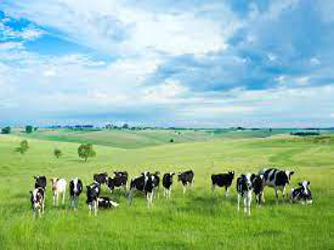

Description:
a herd of cows grazing in a field with confidence 51.67%


In [11]:
# Open image file
image_path = "images/cows.jpg"
image = open(image_path, "rb")

# Display the image
display(Image.open(image_path).resize((334, 250)))

# Call the API
description_result = computervision_client.describe_image_in_stream(image)

# Get the description with confidence level
print("Description:")
if (len(description_result.captions) == 0):
    print("No description detected.")
else:
    for caption in description_result.captions:
        print(f"{caption.text} with confidence {caption.confidence * 100:.2f}%")

### Tag visual features

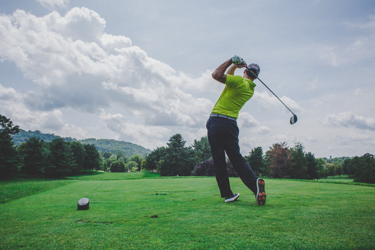

Tags:
athletic game: 99.78%
sport: 99.73%
outdoor: 99.51%
grass: 99.33%
sky: 99.21%
golf: 99.06%
cloud: 97.52%
golf course: 97.21%
golf equipment: 97.04%
sports equipment: 96.10%
golfer: 95.72%
speed golf: 95.55%
pitch and putt: 95.39%
golf club: 95.28%
foursome (golf): 93.97%
professional golfer: 93.76%
match play: 92.35%
fourball: 91.63%
golf ball: 91.51%
tree: 90.05%
person: 87.45%
sand wedge: 87.33%
lob wedge: 86.28%
field: 55.99%


In [12]:
# Open image file
image_path = "images/golf.jpg"
image = open(image_path, "rb")

# Display the image
display(Image.open(image_path).resize((375, 250)))

# Call the API
tags_result = computervision_client.tag_image_in_stream(image)

# Get the tags with confidence level
print("Tags:")
if (len(tags_result.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result.tags:
        print(f"{tag.name}: {tag.confidence * 100:.2f}%")

### Categorize an image

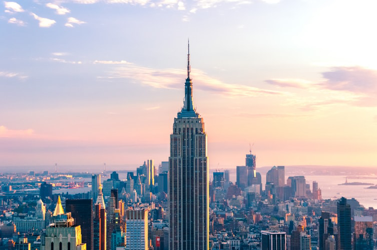

Categories:
building_: 31.25%
building_street: 62.89%


In [13]:
# Open image file
image_path = "images/empirestatebuilding.jpg"
image = open(image_path, "rb")

# Display the image
display(Image.open(image_path).resize((377, 250)))

# Call the API
# By default, image categories are returned.
categorize_result = computervision_client.analyze_image_in_stream(image)

# Get the categories with confidence score
print("Categories:")
if (len(categorize_result.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_result.categories:
        print(f"{category.name}: {category.score * 100:.2f}%")

### Detect faces

Faces:


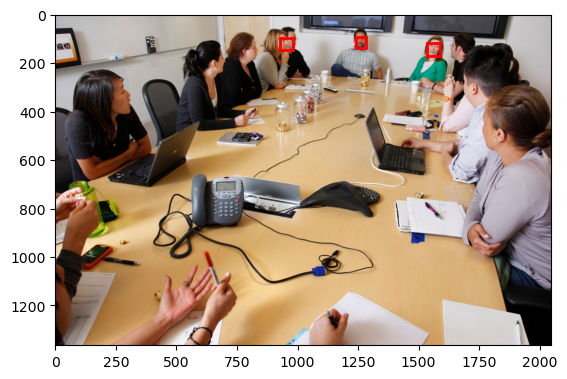

In [24]:
# Open image file
image_path = "images/peopleworking2.jpg"
image = open(image_path, "rb")

img = Image.open(image_path)

# Select visual features you want
img_features = ["faces"]

# Call the API
faces_result = computervision_client.analyze_image_in_stream(image, img_features)

# Print the results

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

print("Faces:")
if (len(faces_result.faces) == 0):
    print("No faces detected.")
else:
    for face in faces_result.faces:
        # Create a Rectangle patch
        rect = patches.Rectangle((face.face_rectangle.left, face.face_rectangle.top), face.face_rectangle.width, face.face_rectangle.height, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

plt.show()

### Detect objects

Objects in image:


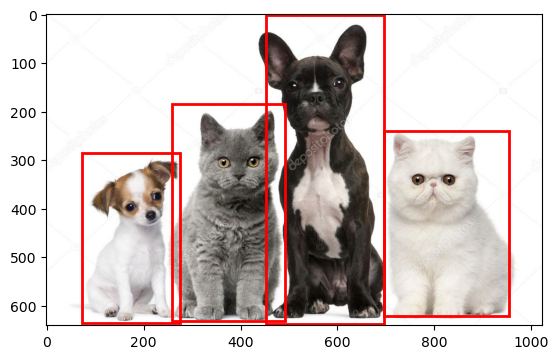

In [15]:
# Open image file
# This section of code opens an image file named cats.jpg located in the images folder and creates an image object named img 
# using the Pillow library.
image_path = "images/cats.jpg"
image = open(image_path, "rb")

img = Image.open(image_path)



# We Call our API
detect_objects_results = computervision_client.detect_objects_in_stream(image)

# Print results of detection with bounding boxes

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

print("Objects in image:")
if len(detect_objects_results.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results.objects:
        # Create a Rectangle patch
        rect = patches.Rectangle((object.rectangle.x, object.rectangle.y), object.rectangle.w, object.rectangle.h, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

plt.show()

Objects in image:


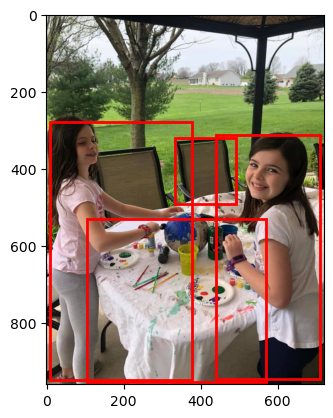

In [19]:
# Open image file
# This section of code opens an image file named cats.jpg located in the images folder and creates an image object named img 
# using the Pillow library.
image_path = "images/home.jpg"
image = open(image_path, "rb")

img = Image.open(image_path)



# We Call our API
detect_objects_results = computervision_client.detect_objects_in_stream(image)

# Print results of detection with bounding boxes

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

print("Objects in image:")
if len(detect_objects_results.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results.objects:
        # Create a Rectangle patch
        rect = patches.Rectangle((object.rectangle.x, object.rectangle.y), object.rectangle.w, object.rectangle.h, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

plt.show()

Identified objects and their coordinates within the image are: 


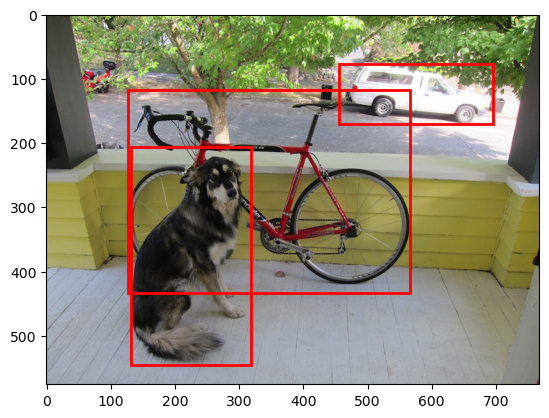

In [30]:
# Open image file
# This section of code opens an image file named home2.jpg located in the images folder and creates an image object named img 
# using the Pillow library.
image_path = "images/home2.jpg"
image = open(image_path, "rb")

img = Image.open(image_path)



# We Call our API
detect_objects_results = computervision_client.detect_objects_in_stream(image)

# Print results of detection with bounding boxes

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

print("Identified objects and their coordinates within the image are: ")
if len(detect_objects_results.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results.objects:
        # Create a Rectangle patch
        rect = patches.Rectangle((object.rectangle.x, object.rectangle.y), object.rectangle.w, object.rectangle.h, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

plt.show()

### Get image color scheme

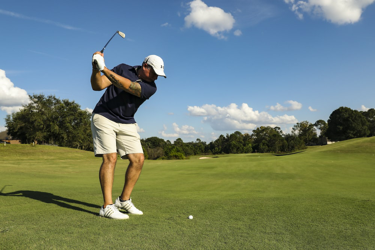

Color scheme:
Is black and white: False
Accent color: 8E713D
Dominant background color: Black
Dominant foreground color: Black
Dominant colors: []


In [21]:
# Open local image file
image_path = "images/golf.jpg"
image = open(image_path, "rb")

# Display the image
display(Image.open(image_path).resize((375, 250)))

# Select the feature(s) you want
img_features = ["color"]

# Call the API
color_result = computervision_client.analyze_image_in_stream(image, img_features)

# Get the categories with confidence score
print("Color scheme:")
print(f"Is black and white: {color_result.color.is_bw_img}")
print(f"Accent color: {color_result.color.accent_color}")
print(f"Dominant background color: {color_result.color.dominant_color_background}")
print(f"Dominant foreground color: {color_result.color.dominant_color_foreground}")
print(f"Dominant colors: {color_result.color.dominant_colors}")

### Get domain-specific content

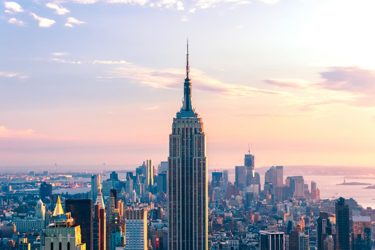

Landmarks:
Empire State Building


In [22]:
# Open local image file
image_path = "images/empirestatebuilding.jpg"
image = open(image_path, "rb")

# Display the image
display(Image.open(image_path).resize((375, 250)))

# Call API with content type (celebrities) and URL
detect_landmark_results = computervision_client.analyze_image_by_domain_in_stream("landmarks", image)

# Print detection results with name
print("Landmarks:")
if len(detect_landmark_results.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in detect_landmark_results.result["landmarks"]:
        print(landmark["name"])

### Generate Thumbnail

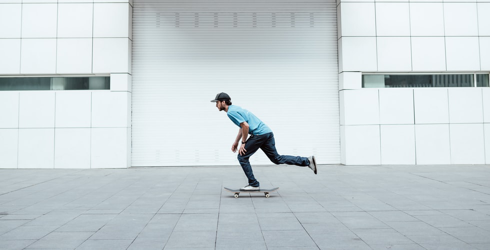

Generating thumbnail...


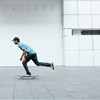

In [18]:
# Open local image file
image_path = "images/skateboard.jpg"
image = open(image_path, "rb")

# Display the image
display(Image.open(image_path).resize((490, 250)))

print("Generating thumbnail...")
# Call the API
thumb_local = computervision_client.generate_thumbnail_in_stream(100, 100, image, True)

# Write the image binary to file
with open("images/thumb.png", "wb") as f:
    for chunk in thumb_local:
        f.write(chunk)

# Display the image
display(Image.open("images/thumb.png"))